<a href="https://colab.research.google.com/github/rodrigoreisbr-tech/data_science/blob/master/Analisando_os_Dados_do_IFood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do iFood - *CASE* 

<center><img alt="Logo iFood" width="10%" src="https://github.com/rodrigoreisbr-tech/data_science/blob/master/img/IFood_logo.png?raw=true"></center>

A história do [iFood](https://institucional.ifood.com.br/) começou fora do mundo digital, em 2011, com a Disk Cook. Um guia (impresso!) de cardápios, com uma central telefônica para onde você ligava e fazia o seu pedido. A ideia do [iFood](https://institucional.ifood.com.br/) surgiu aí, para melhorar essa experiência.

Não demorou muito pra eles sairem do papel e ganhar o Brasil. Já no ano seguinte, foi lançado o aplicativo e o site. E a paixão por alimentação e tecnologia logo chamou a atenção de investidores importantes, como o Grupo Movile - que até hoje são parceiros.

Hoje, o [iFood](https://institucional.ifood.com.br/) é a  **FoodTech** de referência na América Latina.

<br>
<br>

-------------------------------
**Neste *notebook*, iremos analisar os dados referentes ao case do iFood, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [70]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [71]:
# importar o arquivo ml_project1_data.csv para um DataFrame
# CSV disponibilizado pelo site Github do IFood (Copia no meu Github) 
#df = pd.read_csv("https://raw.githubusercontent.com/rodrigoreisbr-tech/data_science/master/dataset/ml_project1_data.csv")
# importação de dados (CSV realocado para Github)
df = pd.read_csv("https://raw.githubusercontent.com/ifood/ifood-data-business-analyst-test/master/ml_project1_data.csv")


## Análise dos Dados

Segue abaixo a analise dos dados do dataset entregue pelo iFood

**Dicionário das variáveis**

* `AcceptedCmp1` - 1 if costumer accepted the offer in the 1 campaign, 0 otherwise
* `AcceptedCmp2` - 1 if costumer accepted the offer in the 2 campaign, 0 otherwise
* `AcceptedCmp3` - 1 if costumer accepted the offer in the 3 campaign, 0 otherwise
* `AcceptedCmp4` - 1 if costumer accepted the offer in the 4 campaign, 0 otherwise
* `AcceptedCmp5` - 1 if costumer accepted the offer in the 5 campaign, 0 otherwise
* `Response(target)` - 1 if costumer accepted the offer in the last campaign, 0 otherwise
* `Complain` - 1 if costumer complained in the last 2 years
* `DtCustomer` - date of custoner's enrollment with the company
* `Education` - customer's level of educarion
* `Marital` - customer's marital status
* `Kidhome` - number of small children in customer's household
* `Income` - customer's yearly household income
* `MntFishProducts` - amount spent on fish produts in the 2 years
* `MntMeatProducts` - amount spent on meat produts in the 2 years
* `MntFruits` - amount spent on fruits in the 2 years
* `MntSweetProducts` - amount spent on sweet produts in the 2 years
* `MntWines` - amount spent on wines in the 2 years
* `MntgoldProds` - amount spent on *gold* products in the 2 years
* `NumDealsPurchases` - number of purchases made with discount
* `NumCatalogPurchases` - number of purchases made using catalogue
* `NumStorePurchases` - number of purchases made directly in stores
* `NumWebPurchases` - number of purchases made through company's web site
* `NumWebVisitsMonth` - number of visits to company's web site in the last month
* `Recency` - number of days since the last purchase


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [22]:
# mostrar as 5 primeiras entradas
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### **Adicionando informações uteis para analise.**

Nesta seção iremos adiconar algumas colunas para conseguir melhor nossa analise de dados, todos as colunas que iremos adiconar sao calculos prevenientes dos dados do dataset.

<br>

**Dicionário das variáveis**
* `CurrentYear` - current year
* `YearCustomer` - year the customer started
* `Age` - customer age
* `MonthsCustomer` - number of months they are our customer
* `IncomeMonth` - average monthly income



In [ ]:
#Adiciona uma coluna com o Ano atual e quanto o cliente se cadastrou
df["CurrentYear"] = datetime.today().strftime("%Y")
df["YearCustomer"] = pd.to_datetime(df["Dt_Customer"]).dt.year
df["CurrentYear"] = df["CurrentYear"].astype(float)
df["YearCustomer"] = df["YearCustomer"].astype(float)
df["YearsCustomer"] = df["CurrentYear"] - df["YearCustomer"]

#Adiciona uma coluna com a idade do Cliente
df["Age"] = df["CurrentYear"] - df["Year_Birth"]

#Adiciona uma coluna com quantos meses esta como cliente e o gasto por mês
df["MonthsCustomer"] = df["YearsCustomer"] * 12
df["IncomeMonth"] = df["Income"] / df["MonthsCustomer"]


### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [19]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# display(df.dtypes)
df.info()

Entradas:	 2240
Variáveis:	 29
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDeal

### **2. Qual a porcentagem de valores ausentes no *dataset*?**

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False)

Income                 0.010714
ID                     0.000000
NumDealsPurchases      0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumWebPurchases        0.000000
MntGoldProds           0.000000
Year_Birth             0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Response               0.000000
dtype: float64

In [21]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


### **3. Qual o tipo de distribuição das variáveis?**

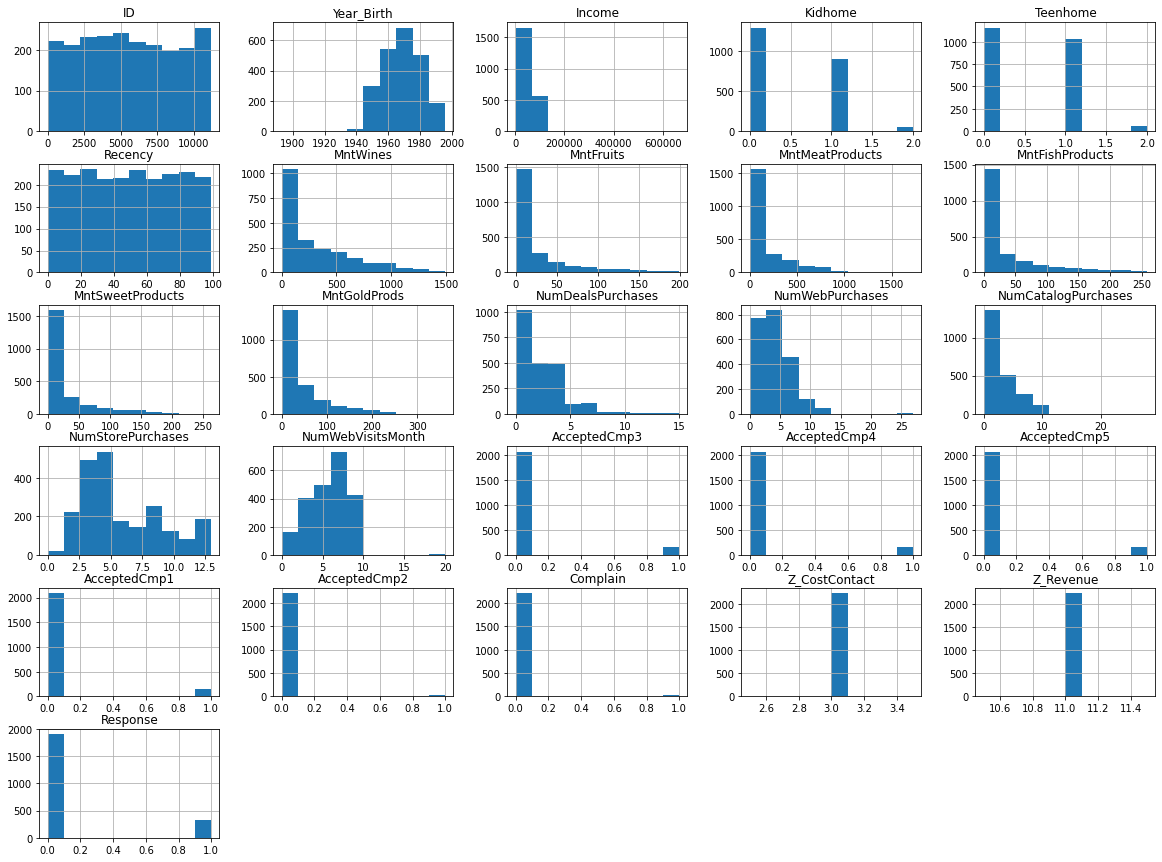

In [13]:
# plotar o histograma das variáveis numéricas (distribuição dos dados)
df.hist(bins=10, figsize=(20,15));


### **4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar que não há presença de *outliers*.

### **5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [16]:
# criar uma matriz de correlação
corr = df[['Dt_Customer', 'MntWines', 'MntSweetProducts', 'MntMeatProducts',
    'Income', 'Year_Birth']].corr()

display(corr)

,MntWines,MntSweetProducts,MntMeatProducts,Income,Year_Birth
MntWines,1.000000,0.386581,0.562667,0.578650,-0.157773
MntSweetProducts,0.386581,1.000000,0.523846,0.440744,-0.018133
MntMeatProducts,0.562667,0.523846,1.000000,0.584633,-0.030872
Income,0.578650,0.440744,0.584633,1.000000,-0.161791
Year_Birth,-0.157773,-0.018133,-0.030872,-0.161791,1.000000


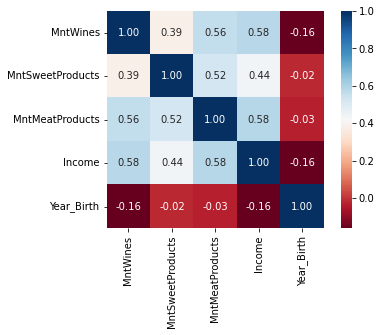

In [17]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **6. Qual a média dos gastos?**

A media dos gastos "*Income*" dos clientes

In [72]:
# ver a média da coluna `Income``
df['Income'].mean()

52247.25135379061

In [74]:
# como esta distribuido
df['Income'].describe(include='all')

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

### **7. Qual é a relação entre o estato civil e gastos?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método value_counts().

In [76]:
df_MStatus = df.groupby(["Marital_Status"])["Income", "MntWines", "MntMeatProducts", "MntSweetProducts", "MntGoldProds",  "MntFruits"].mean()

display(df_MStatus)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Income,MntWines,MntMeatProducts,MntSweetProducts,MntGoldProds,MntFruits
Marital_Status,,,,,,
Absurd,72365.500000,355.500000,312.500000,30.500000,204.000000,84.500000
Alone,43789.000000,184.666667,26.333333,7.000000,27.000000,4.000000
Divorced,52834.228448,324.844828,150.206897,26.818966,46.288793,27.426724
Married,51724.978996,299.480324,160.681713,26.701389,42.822917,25.734954
Single,50995.350318,288.331250,182.108333,27.262500,43.729167,26.835417
Together,53245.534031,306.825862,168.103448,26.122414,42.994828,25.350000
Widow,56481.552632,369.272727,189.285714,39.012987,56.766234,33.090909
YOLO,48432.000000,322.000000,50.000000,3.000000,42.000000,3.000000


In [77]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [78]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.Complain.value_counts() / df.shape[0]

0    0.990625
1    0.009375
Name: Complain, dtype: float64

### **8. Qual gasto medio por estato civil e educação?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os estato civil com a Educação a partir dos gastos.



In [85]:
# ver preços por bairros, na média
df.groupby(['Marital_Status','Education']).Income.mean().sort_values(ascending=False)[:10]

Marital_Status  Education 
Absurd          Graduation    79244.000000
                Master        65487.000000
Alone           Master        61331.000000
Widow           PhD           60288.083333
                Master        58401.545455
Married         PhD           58138.031579
Together        PhD           56041.422414
                Graduation    55758.480702
Widow           Graduation    54976.657143
Divorced        Graduation    54526.042017
Name: Income, dtype: float64

Acima, vemos que bairros o Centro,Kitsilano, Dunbar Southlands, estão com média de preço superior a de lugares como West Point Grey, Oakridge e West End.

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


## Conclusões
